# Programming for Data Analytics #

## Project 1 ##

***

**Project Objectives**

This project is to selct a real world phenomenon and synthesise and model data relating to the selected phenomenon. Key considerations

- Use numpy.random to synthesise data
- Phenomenon must be measurable with potential to collect 100 data points across 4 variables,
- Simulate data set matching the dataset as closely as possible
- Detail project research.


**Selected Phenomenon**

The phenomenon that I have selected to analyse in this project is the level of engagement received by DMO the number of likes received by tweets, specifically the relationship between the primamry determinants of likes per Tweet and the tweet like numbers.




##  Project approach ##

The project approach I have adopted to complete this project follows the below broad steps. Each step is furhter expanded throughout this Jupyter notebook:

1. Identify Phenomenon,
2. Source real data set,
3. Prepare real data set for analysis,
4. Analyse real data set for distribution and relationships,
5. Synthesise/simulate data sets

### Phenomenon Research ###

Infomration pertaining to tweet performance with regard to number of likes is readily available. A data set, detailing tweet performmance and content is published on kaggle. 
Based on further research, the variables that effect twitter engagement, the nominated engagement variable for this project is likes, include a number of factors such as language of tweet, the inclusion of media (photos, videos, links etc.), day/time of tweet, number of account followers. 

The most interesting variables that influence tweet engagement or like count are:
1. the day of the week of the tweet, 
2. the number of followers the account has, 
3. the inclusion of a photo or video, 
4. the length of the tweet (characters)


## Libraries ##

Here is where I load in the required libraries for completing the project

In [1]:
#import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Prepare Real Data set for Analysis ##

First I want to read in all of the real world data from the csv file that I downloaded from kaggle and stored in the data forlder in the project directory. I only import the fields/columns that I may be intereted in as the file contains a broad range of data columns that relate to each tweet but will not be used in this project. initially, the fields that I am importing include:

- Like Count,
- the Day the tweet was published,
- The time of the tweet,
- The number of followers the page that published the tweet has,
- The status text - the actual tweet content or status
- Media type attached to the tweet 

This then allows me to print the data to the screen to ensure the data selected is the relevant data. 

In [2]:
# read in data from the csv file in the data folder
tweet = pd.read_csv('data/Data LIWC 01 02 23.csv', usecols = ['State', 'like_count', 'DateDay', 'Time', 'Followers', 'Status text', 'Vividness' ]) # import relevant data from CSV file
#print (tweet) #Print the data to the screen to conirm the correct data was imported

Next we want to make a number of amendments to the data set in order to facilitate better analysis. The following changes/amendments to the data set are initially proposed in order to standardise and convert recorded data to numerical values.

Newly created values, based on the original values will be appended to the exisitng tweet data frame and saved as a new data frame called tweet2.

 - Like Count => This is an integar value that can be any value including zero. No transformation will be carried out on this value.
 - DateDay => this is a text value listing the day of the week that the tweet was published. This will be transformed to a numberical value from 0 - 6, with Monday being 0 and Sunday being 6.
 - Time => this is a text valie listing if the tweet was published during business hours or Non-Business hours. Non-business hours will be 0 and Business hours will be 1.
 - Followers => This is an integar value that can be any value including zero. No transformation will be carried out on this value.
 - Status text => this is a text value listing the text content of the relevant tweet. This will be converted to a numerical value counting the length of the tweet in characters.
 - Vividness => this is a text value detailing the media form that is attached to each tweet. This will be converted to a numerical value where 0 represents photos and 1 represents video. 

 

In [3]:
tweet["NewDay"] = "" #create a new column in the data frame
#print (tweet) # print to confirm the creation of the new column
#Update the value of DateDay to be a integar value from 0 - 6 based on the day of the week
tweet.loc[tweet['DateDay']=="Monday",['NewDay']]=0
tweet.loc[tweet['DateDay']=="Tuesday",['NewDay']]=1
tweet.loc[tweet['DateDay']=="Wednesday",['NewDay']]=2
tweet.loc[tweet['DateDay']=="Thursday",['NewDay']]=3
tweet.loc[tweet['DateDay']=="Friday",['NewDay']]=4
tweet.loc[tweet['DateDay']=="Saturday",['NewDay']]=5
tweet.loc[tweet['DateDay']=="Sunday",['NewDay']]=6
#print (tweet) # print to confirm the creation of new integer values in the column NewDay

In [4]:
tweet["TweetTime"] = "" #create a new column in the data frame
#print (tweet) # print to confirm the creation of the new column
#Update the value of Time to be a integar value of 0 or 1 depending if the tweet was published buring busiess or non-business hours
tweet.loc[tweet['Time']=="Non-buisness hours",['TweetTime']]=0 # Note there is a spelling error in the CSV file that has been accounted for here in the transformation
tweet.loc[tweet['Time']=="Business hours",['TweetTime']]=1
#print (tweet) # print to confirm the creation of new integer values in the column TweetTime

In [5]:
tweet["TweetLen"] = tweet["Status text"].str.len() #create a new column in the data frame to represent the length of the tweet
#print (tweet) # print to confirm the creation of the new column complete with lenght of the tweet

#Refernce for implementation: https://stackoverflow.com/questions/42815768/pandas-adding-column-with-the-length-of-other-column-as-value

In [6]:
tweet["Media"] = "" #create a new column in the data frame to represent the presence of media in the tweet
#print (tweet) # print to confirm the creation of the new column
#Update the value of Time to be a integar value of 0, 1 or 2 depending if the tweet was published with a photo,a video or text
tweet.loc[tweet['Vividness']=="photo",['Media']]=0
tweet.loc[tweet['Vividness']=="video",['Media']]=1
tweet.loc[tweet['Vividness']=="text",['Media']]=2
#print (tweet) # print to confirm the creation of new integer values in the column Media

In [7]:
#Now, I am creating a new data frame with just the fields that I want to include in my analysis. This includes the fields that the above transformations have been carried out upon.

df = tweet[['State', 'like_count', 'NewDay', 'TweetTime', 'Followers', 'TweetLen', 'Media']]
print(df)

#reference for implementation: https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/?expand_article=1

       State  like_count NewDay TweetTime  Followers  TweetLen Media
0      Assam           1      2         0       5164       192     0
1      Assam           1      3         1       5164       257     0
2      Assam           1      6         0       5164       226     0
3      Assam           3      0         1       5164       264     0
4      Assam           1      1         0       5164       211     0
...      ...         ...    ...       ...        ...       ...   ...
23001  Assam          14      4         0       5164        83     0
23002  Assam          38      4         0       5164       309     0
23003  Assam          33      6         0       5164       310     0
23004  Assam          15      6         0       5164       178     0
23005  Assam          16      1         0       5164       159     1

[23006 rows x 7 columns]


## Real Data Analysis ##

Now that we have the real data transformed and stored in the data frame df, we can start analysing the values that are in the data frame. The objective here is to dive deeper into the data in order to fully understand the variable features in order to facilitate the synthesis of data to closely reflect the real data. 



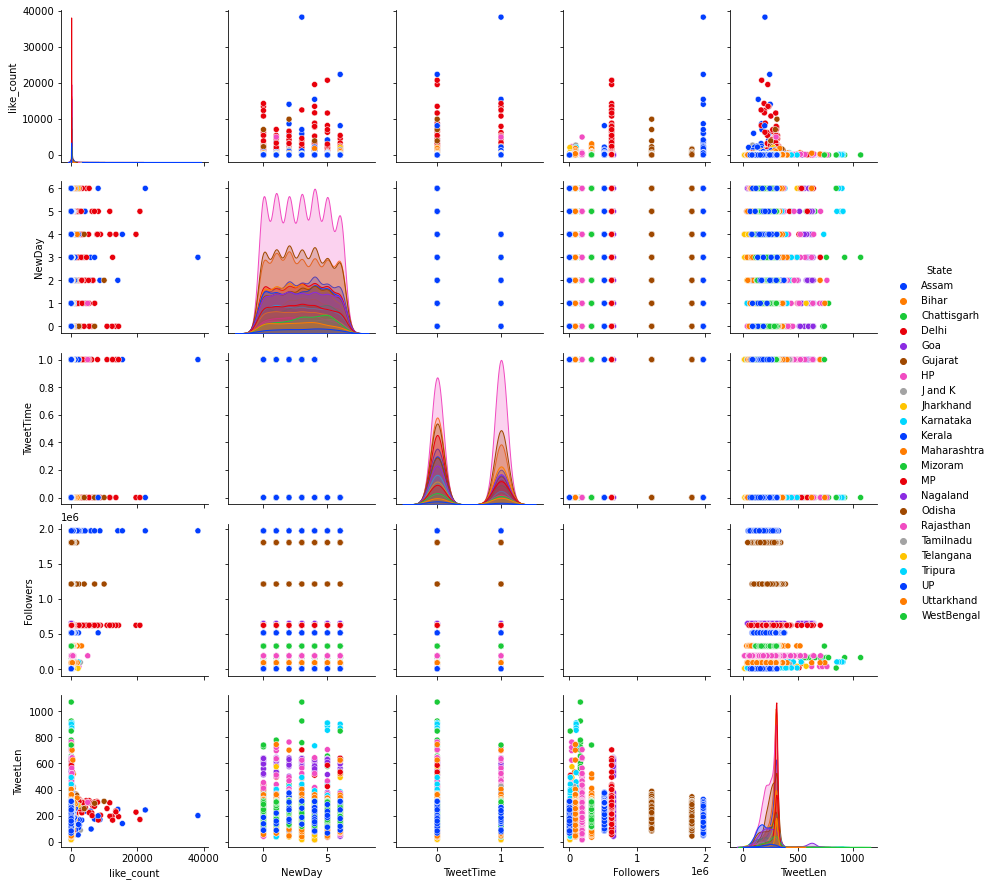

In [9]:
sns.pairplot(df, hue="State", palette="bright");

The above pair plot illustrates the relationship between each of the data points, I have applied filtering by region ot further illustrate the variances and relationships by location. While not a key variable for this analysis it is interesting to observe the variances by region. 

The next step in my analysis will look at the distribtuions of each of the variables

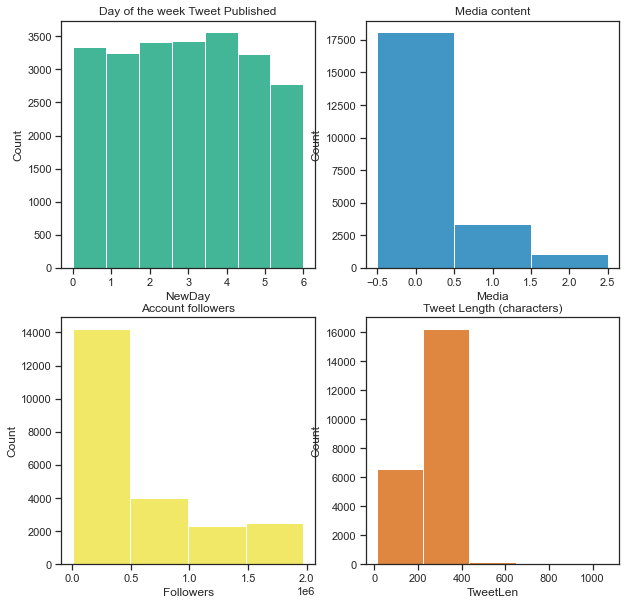

In [15]:
#create sub plots to represent multiple variables. This will demonstrate the distribution of each of the relevant variables 
sns.set(style = "ticks", palette="colorblind")
f,axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].set_title("Day of the week Tweet Published")
sns.histplot(df['NewDay'], ax=axes[0,0], bins=7, color="g");
axes[0,1].set_title("Media content")
sns.histplot(df['Media'], ax=axes[0,1], bins=3, color="b");
axes[1,0].set_title("Account followers")
sns.histplot(df['Followers'], ax=axes[1,0], bins=4, color="y");
axes[1,1].set_title("Tweet Length (characters)")
sns.histplot(df['TweetLen'], ax=axes[1,1], bins=5, color="r");

The distribution of the day that tweets were published is relatively evenly distributed across the week with tweet frequency increcsing marginally from Monday to Friday and a signfincant decline for Saturday and Sunday.
Media content is signifincantly skewed towards photo media, with the majority of posts containing a photograph.

### Distribution of data by State ###

We will use the numpy library to analyse the data further, calculating the mean and standard deviation of the data by state within the dataset.



In [25]:
#Create a table that summarises each of the variables to demonstrate the average and the standard deviation of the tweet information by state. I have rounded the results to 2 decimal places in order to imrove the appearance and readability of the table.
df.groupby(["State"]).agg([np.mean, np.std]).round(2).sort_values(('like_count', 'mean'), ascending=False)

like_count          NewDay       TweetTime        Followers       \
                  mean      std   mean   std      mean   std       mean  std   
State                                                                          
MP              495.44  1480.05   2.94  1.97      0.26  0.44   625186.0  0.0   
Kerala          452.66  1458.10   2.99  1.99      0.38  0.48  1972674.0  0.0   
Bihar           206.57   135.29   2.77  1.92      0.52  0.50    81503.0  0.0   
Maharashtra     204.47   296.91   2.81  1.91      0.49  0.50   331116.0  0.0   
Gujarat         186.47   147.47   3.02  1.94      0.37  0.48  1805768.0  0.0   
J and K         170.79   214.72   3.05  2.01      0.43  0.50    96691.0  0.0   
Karnataka       149.32   170.59   2.85  1.96      0.31  0.46   102662.0  0.0   
UP              141.93   247.36   3.08  1.96      0.38  0.49   517867.0  0.0   
Jharkhand        99.97   104.74   2.73  1.89      0.30  0.46    40816.0  0.0   
Rajasthan        97.84   118.17   2.94  1.97      0.53  0.50   190197.0  0.0   
HP               94.67   140.92   2.88  1.90      0.45  0.50    37155.0  0.0   
Tamilnadu        93.62   107.36   2.61  1.85      0.50  0.50    68999.0  0.0   
Odisha           86.61   284.78   2.91  1.97      0.48  0.50  1213817.0  0.0   
Uttarkhand       69.19    74.35   2.96  2.00      0.41  0.49    91325.0  0.0   
Chattisgarh      48.63    62.91   3.21  1.84      0.43  0.50   164748.0  0.0   
Goa              43.67    35.07   3.00  1.98      0.44  0.50   650771.0  0.0   
Tripura          37.26    34.56   2.80  1.86      0.24  0.42    16369.0  0.0   
WestBengal       34.69    30.18   2.69  1.83      0.50  0.50   328751.0  0.0   
Mizoram          31.49    39.09   2.99  1.98      0.47  0.50    15324.0  0.0   
Nagaland         14.67    27.62   3.18  1.92      0.36  0.48     8730.0  0.0   
Telangana        13.80    76.98   3.00  1.90      0.49  0.50    10674.0  0.0   
Delhi            11.19    12.71   2.88  1.95      0.54  0.50    19623.0  0.0   
Assam             8.49    14.08   3.07  1.94      0.34  0.48     5164.0  0.0   

            TweetLen          
                mean     std  
State                         
MP            294.19   36.46  
Kerala        203.94   66.19  
Bihar         295.63   33.88  
Maharashtra   261.15   59.29  
Gujarat       228.98   68.10  
J and K       227.29   70.91  
Karnataka     288.35   70.26  
UP            269.20   46.93  
Jharkhand     261.62   59.28  
Rajasthan     243.47   62.87  
HP            234.68   93.36  
Tamilnadu     259.87   60.99  
Odisha        260.48   49.15  
Uttarkhand    268.86   53.86  
Chattisgarh   269.46  100.04  
Goa           262.05  132.42  
Tripura       243.17   71.98  
WestBengal    262.13   60.72  
Mizoram       219.16   81.01  
Nagaland      200.72   82.57  
Telangana     240.16   65.60  
Delhi         278.19   53.96  
Assam         225.64   60.80

The following shows the mean and standard deviation for the global data set

In [26]:
df.agg([np.mean, np.std]).round(2)

,like_count,NewDay,TweetTime,Followers,TweetLen
mean,139.50,2.93,0.43,508226.52,254.49
std,537.27,1.95,0.50,596031.46,70.47


In [28]:
df.describe().round(2)

,like_count,Followers,TweetLen
count,23006.00,23006.00,23006.00
mean,139.50,508226.52,254.49
std,537.27,596031.46,70.47
min,0.00,5164.00,14.00
25%,27.00,91325.00,215.00
50%,63.00,190197.00,275.00
75%,137.00,650771.00,302.00
max,38244.00,1972674.00,1070.00


## Simulated Data ##

I will now simulate the data based on the above analysis using numpy.random. This allows me to generate synthetic data based on the above actual data. 



### Like Count ###

The below shows the analysis of the Like count variable. In order to simulate or sythesise data, we must understand the characterisitics of each variable.

In [30]:
df['like_count'].describe().round(2) # generate a description of the like count variable rounded to 2 decimal places


count    23006.00
mean       139.50
std        537.27
min          0.00
25%         27.00
50%         63.00
75%        137.00
max      38244.00
Name: like_count, dtype: float64

**Distribution**

The Below shows the distribution of the like count variable

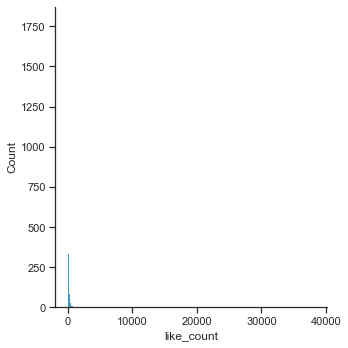

In [41]:
sns.displot(df['like_count'], label="Number of Likes")

The above distribution plot cleary suggests that outliers exisit within the dataset, in order to further investigate the data, I generate a box plot of the information

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='like_count'>

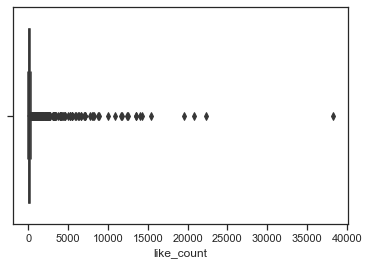

In [44]:
#generate box plot to illustrate outliers
sns.boxplot(df['like_count'])

THe above box plot confirms there are a number of outliers. This combined with the distribution plot confrims that there are outliers within the data that are affecting the readibility of the data. In order to effectively simlate the data, we will need to remove the outliers and regenerate the above analysis.

### Z-Score Method to outlier removal ###

My objective here is to find the upper and lower limits, I have set this to be 5 standard deviations in both directions from the mean value.

In [61]:
upper_limit = df['like_count'].mean()+3*df['like_count'].std()
lower_limit = df['like_count'].mean()-3*df['like_count'].std()
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 1751.30638059676
Lower Limit: -1472.3037725814597


In [62]:
#next we want to locate the outliers and remove them from the dataset

df.loc[(df['like_count'] > upper_limit )| (df['like_count'] < lower_limit)]

,State,like_count,NewDay,TweetTime,Followers,TweetLen,Media
4322,HP,2346,0,0,37155,252,1
4441,J and K,1945,6,0,96691,101,0
4442,J and K,2772,2,1,96691,89,0
5446,Karnataka,2160,4,1,102662,297,0
6152,Kerala,1884,4,0,1972674,163,0
...,...,...,...,...,...,...,...
13893,Rajasthan,4997,1,1,190197,302,0
17994,Telangana,2089,6,0,10674,279,1
19561,UP,2210,4,1,517867,133,0
19962,UP,8144,6,0,517867,199,0


The above analysis identifies 65 outliers within the dataset. We will now remove these value by trimming the outliers from the dataframe and creating a new dataframe


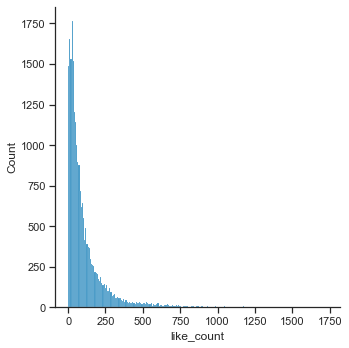

In [65]:
#we are now creating a new dataframe called df2 by trimming the original dataframe.
df2 = df.loc[(df['like_count'] < upper_limit ) & (df['like_count'] > lower_limit)]
#recreating the distribution chart excluding the outliers
sns.displot(df2['like_count'], label="Number of Likes")
#recreating the box plot, excluding the above outliers
#sns.boxplot(df2['like_count'])



The above distributuon shows an exponential distributions. The Numpy documentation describes typical phenomenon that assume a exponential distribution include *"the size of raindrops measured over many rainstorms [1], or the time between page requests to Wikipedia [2]"*

Further research confirms the assessment of the number likes be an exponential distribution with the common characteristics being a right skewed continious probability distributuin with variables with smaller values occur more frequently that variables with large values.




In [66]:
#Describe the amended dataset
df2['like_count'].describe().round(2)

count    22896.00
mean       114.42
std        159.80
min          0.00
25%         27.00
50%         63.00
75%        136.00
max       1731.00
Name: like_count, dtype: float64

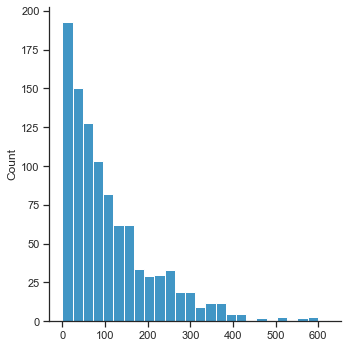

In [75]:
#Simulating the data using numpy based on the filtered like count assocuated with df2
sim_like = np.random.exponential(scale=df2['like_count'].mean(), size=1000)
sns.displot(sim_like, label="Simulated Number of Likes")


#reference to numpy library for exponential distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

### Followers ###

The following section deals with the distribtution of followers across the accounts included in the real world data. While this may not be representative of global Twitter account followers, it is consistent with the reset of the data included in this analysis. For the purpose of this project we will assume the sample data is representative of the global follower distribution.

In [76]:
df2['Followers'].describe().round(2) # generate a description of the Followers variable rounded to 2 decimal places

count      22896.00
mean      506601.82
std       595648.82
min         5164.00
25%        91325.00
50%       190197.00
75%       650771.00
max      1972674.00
Name: Followers, dtype: float64

**Distribution**

The Below shows the distribution of the Followers variable

### Tweet Length ###

The following section deals with the distribtution of Tweet Length across the accounts included in the real world data. While this may not be representative of global tweet lenghts, it is consistent with the reset of the data included in this analysis. For the purpose of this project we will assume the sample data is representative of the global tweet length distribution.

Another factor to remain conscious is the limitation of tweet lenght enforced by twitter, each tweet is limited in terms of the number of characters available to the user in any one tweet. 

### Day of Week ###

The following section deals with the disctribtuin of tweets across the days of the week. Day of the week is an important variable in regard to the total engagement a tweet receives. Inital analysis suggests that tweets are relatively evenly distributed across the week. 

***

## References ##

Mendley Data Set: https://data.mendeley.com/datasets/bfk3hvdcnt/1

Kaggle data set source: https://www.kaggle.com/datasets/jocelyndumlao/dmo-social-media-engagement-dataset

Determining factors that drive twitter engagement rates: https://journals.scholarpublishing.org/index.php/ABR/article/download/2700/1677#:~:text=These%20variables%20includes%20the%20day,the%20tweet%20among%20other%20variables.

Investigating Outliers: https://www.youtube.com/watch?v=Cw2IvmWRcXs

Statistics by Jom: https://statisticsbyjim.com/probability/exponential-distribution/

***
# End #